# Problem Set 1: Neural Networks
#### Submitted by Sahana Bhat

### Part 1: Perceptrons by hand

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# function used to plot X values and the line of seperation
# this function will be used to plot for all the questions in Part 1
def plottingPerceptron(training_set, weights):
    plt.figure(0)
    # setting X and Y axis values
    x1 = [training_set[i][0][0] for i in range(4)]
    x2 = [training_set[i][0][1] for i in range(4)]
    y = [training_set[i][1] for i in range(4)]
    
    df = pd.DataFrame(
        {'x1': x1,
         'x2': x2,
         'y': y
        })
        
    sns.lmplot("x1", "x2", data=df, hue='y', fit_reg=False, markers=["o", "s"])
    
    # plotting decision boundary
    a = [0,-weights[0]/weights[1]]
    c = [-weights[0]/weights[2],0]
    plt.plot(a,c)

#### Question 1:

Given: X0 = 1 ; Theta = 0

Function: W0X0 + W1X1 + W2X2 >= Theta for activation

Substituting values in the equation, we get: 

W0 + 3W1 + W2 >= 0

W0 + W2 >= 0

W0 + 3W1 >= 0 

W0 <= 0

The values for W0, W1, W2 are set such that they fit the above equations :
W0 = -0.4 , W1 = 0.3, W2 = 0.6

Solving for X1 and X2 using the set weights:

-0.4 + 0.3X1 + 0.6X2 >= 0

When X1=0, X2 >= 0.4/0.6 ~ 0.66

When X2=0, X1 >= 0.4/0.3 ~ 1.33


<Figure size 432x288 with 0 Axes>

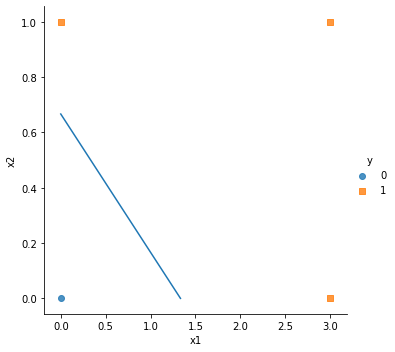

In [3]:
# Plotting the input values and seperation line 
training_set = [((0, 0), 0), ((0, 1), 1), ((3, 0), 1), ((3, 1), 1)]
weights = [-0.4,0.3, 0.6]
plottingPerceptron(training_set, weights)

#### Question 2:

When W0 = -1,

The equations become:

-1 + 3W1 + W2 >= 0

-1 + W2 >= 0

-1 + 3W1 >= 0

Solving for the weights we get:
W2 >= 1 and W1 >= 0.33


#### Question 3:

Given: X0 = 1 ; Theta = 0

Function: W0X0 + W1X1 + W2X2 >= Theta for activation

Substituting values in the equation, we get: 

W0 + 2W1 + 5W2 >= 0

W0 + 2W1 <= 0

W0 + 5W2 <= 0 

W0 <= 0

The values for W0, W1, W2 are set such that they fit the above equations :
W0 = -0.4 , W1 = 0.15, W2 = 0.07

Solving for X1 and X2 using the set weights:

-0.4 + 0.15X1 + 0.07X2 >= 0

When X1=0, X2 >= 0.4/0.07 ~ 5.71

When X2=0, X1 >= 0.4/0.15 ~ 2.66


<Figure size 432x288 with 0 Axes>

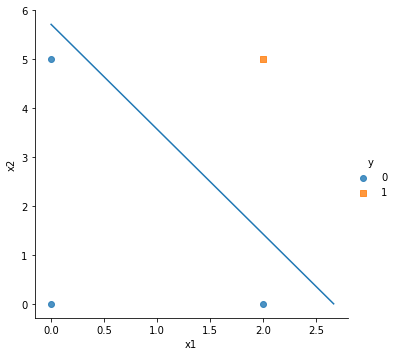

In [4]:
# Plotting the input values and seperation line 
training_set = [((2, 5), 1), ((2, 0), 0), ((0, 5), 0), ((0, 0), 0)]
weights = [-0.4,0.15, 0.07]
plottingPerceptron(training_set, weights)

#### Question 4:

When W0 = -1,

The equations become:

-1 + 2W1 + 5W2 >= 0

-1 + 2W1 <= 0

-1 + 5W2 <= 0

Solving for the weights we get:
W1 >= 0.5 and W2 >= 0.2


#### Question 5:

Given: W1 = W2 = W3 = W4 = 1

In an XOR perceptron, the hidden layer consists of a OR and NOT AND perceptron and the last output layer is made of AND gate.

Equations: 

X1W1 + X2W3 >= Theta1

X1W2 + X2W4 >= Theta2

Theta1 * W5 + Theta2 * W6 >= Theta3

#### To calculate Theta1:

Considering Theta1 as OR activation :     

X1X2Y             

0  0  0             

0  1  1             

1  0  1            

1  1  1            

Substituting values of X1, X2, W1 and W3 , 0 <= Theta1 <= 1. 

Let Theta1 = 0.5

#### To calculate Theta2:

Considering Theta2 as NOT AND activation: To get Theta2 we can negate the threshold value for AND gate. Computing Theta2 for AND gate

X1X2Y

0  0  0

0  1  0

1  0  0

1  1  1

Substituting values of X1, X2, W2 and W4, 1 <= Theta2 <= 2. 

For the NAND gate, Let Theta2 = -1.5

#### To calculate Theta3:

Considering Theta3 which is AND activation. Using the previous calculations from Theta2. 

We get, 1 <= Theta 3 <= 2. 

For the AND gate, Let Theta3 = 1.5

#### To calculate W5 and W6:

From AND gate equations: Theta1 * W5 + Theta2 * W6 >= Theta3

Substituting values of Theta1, 2 and 3 like X1 and X2 in AND gate, we get:

W6 <= 1.5 and W5 <= 1.5

0.5 * W5 - 1.5 * W6 >= 1.5

From solving the equations, Let W5 = 5.5 and W6 = 0.5





### Part 2: Rosenblatt's Algorithm

#### Question 6:

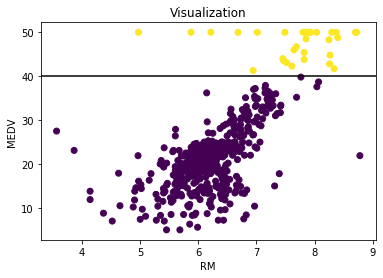

In [5]:
from sklearn.datasets import load_boston
from sklearn.metrics import accuracy_score

boston = load_boston()
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['MEDV'] = boston.target
# highPriced variable is created
boston_df['highPriced'] = boston_df['MEDV'] > 40 
boston_df['highPriced'] = boston_df['highPriced'] * 1
# Visualize your splits on an X-Y plane.
plt.scatter(boston_df['RM'], boston_df['MEDV'], c=boston_df['highPriced'], label=boston_df['highPriced'])
plt.title('Visualization')
# RM on X axis
plt.xlabel('RM')
# LSTAT on Y axis
plt.ylabel('MEDV')
# Horizontal line representing MEDV = 40
plt.axhline(y = 40,color='black')
plt.show()

# The plot shows that a horizontal line, where MEDV = 40 can be used to seperate classes of highPriced as shown below.
# The highPriced values (0,1) are represented with distinct colors (Purple and Yellow)

#### Question 7:

In [6]:
# creating X and Y 
X = boston_df[['MEDV', 'RM']].values
Y = boston_df['highPriced'].values

#### Question 8:

In [7]:
# adding column of 1s
ones = np.ones((len(X),1))
X = np.append(ones,X,1)

print(X[:5,:])

[[ 1.    24.     6.575]
 [ 1.    21.6    6.421]
 [ 1.    34.7    7.185]
 [ 1.    33.4    6.998]
 [ 1.    36.2    7.147]]


#### Question 9:

In [8]:
#setting step and random weights between 0-1
np.random.seed(12)
step = 0.05
print("Step size = "+ str(step))
weights = np.random.rand(X.shape[1])
print("Weights = ")
print(weights)

Step size = 0.05
Weights = 
[0.15416284 0.7400497  0.26331502]


The step size was initially set to 0.1 and has been improved to 0.05 for optimized training

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

#### Question 10:

In [11]:
def myPerceptron(X,Y,step,weights): 
    # To get predicted values
    value = np.dot(X, weights)
    # setting predicted values in range 0-1
    y_predicted = sigmoid(value)
    error = y_predicted - Y
    # to find number of errors in prediction
    sum_error = sum(abs(error.round()))
    
    # To update weights
    temp_bias = weights[0]
    weights -= step * np.dot(X.T, error)
    weights[0] = temp_bias - sum(error) * step
    
    return weights, sum_error

In [12]:
# myperceptron function with gradient descent
def myPerceptronWithGradientDescent(X,Y,step,weights): 
    # To get predicted values
    value = np.dot(X, weights)
    # setting predicted values in range 0-1
    y_predicted = sigmoid(value)
    error = y_predicted - Y
    # to find number of errors in prediction
    sum_error = sum(abs(error.round()))
    
    # Here the derivate of cost or error is used to update values of weights
    derivativeOfPredictedValue = sigmoid_der(y_predicted)
    derivativeOfError = error * derivativeOfPredictedValue
    
    # To update weights
    temp_bias = weights[0]
    weights -= step * np.dot(X.T, derivativeOfError)
    weights[0] = temp_bias - sum(derivativeOfError)* step
    
    return weights, sum_error

#### Question 11:

In [13]:
# using myPerceptron to train the neural network
iter_count = 0
sum_error = 999999
error_list = []
while sum_error>0:
    weights, sum_error = myPerceptron(X,Y,step,weights)
    iter_count+=1
    error_list.append(sum_error)

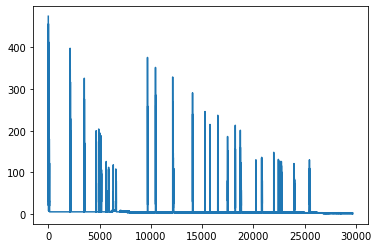

In [14]:
# Plotting Errors vs iterations
plt.plot(error_list)

In [15]:
print("Iterations to converge = " + str(iter_count))

Iterations to converge = 29700


Gradient Descent is an optimization technique that is used to improve deep learning and neural network-based models by minimizing the cost function. We use gradient descent to minimize the cost function, J(w). The weights are updated using derivative of the errors. To implement and verify, I have written the function "myPerceptronWithGradientDescent". The plot of errors obtained using this function was similar and the function took lesser iterations to converge. At the same time, if the learning rate is set very high, gradient descent can take more time to converge. Hence, the gadient descent model is more complex than the usual model.

#### Question 12:

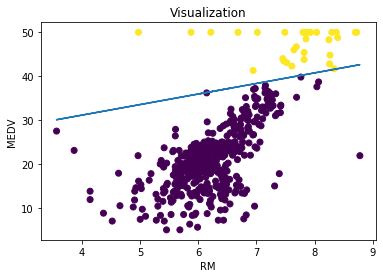

In [16]:
# to calculate slope and y-intercept of the line
m = - weights / weights[1]
plt.scatter(X[:,2],X[:,1], c=Y)
# plotting the separation line 
plt.plot(X[:,2], m[2]*X[:,2]+m[0])
plt.title('Visualization')
# RM on X axis
plt.xlabel('RM')
# LSTAT on Y axis
plt.ylabel('MEDV')
plt.show()

In the visualization, we see that the seperation line splits the True and False values perfectly. But at the same time, the line has been trained for the given training set. I feel the line is overfitting and may not work well for a test set.

### Part 3: Out-of-the-box Neural Networks

#### Question 14:

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [18]:
boston_dataset = pd.DataFrame(boston.data)
boston_dataset.columns = boston.feature_names
X = boston_dataset.values
y = boston.target

In [19]:
# Use 80% of observations for the training set and 20% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)


In [20]:
print("Shape of Training set = " + str(X_train.shape))

print("Shape of Test set = " + str(X_test.shape))

Shape of Training set = (404, 13)
Shape of Test set = (102, 13)


#### Question 15:

In [21]:
from sklearn.neural_network import MLPRegressor

# the function builts MLPRegressor model for given hidden layer size and max number of iterations
# returns training set and test set MAE values
def comparingModels(layer_size, iter_count=1000):
    mlp = MLPRegressor(hidden_layer_sizes=layer_size, max_iter=iter_count)
    mlp.fit(X_train,y_train)
    predict_train = mlp.predict(X_train)
    predict_test = mlp.predict(X_test)
    train_mae = sum(abs(y_train-predict_train))/len(y_train)
    test_mae = sum(abs(y_test-predict_test))/len(y_test)
    return train_mae,test_mae

In [22]:
hidden_layer_list = [2, 5, 10, 20, 50]
train_mae_list = []
test_mae_list = []
for x in hidden_layer_list:
    train_mae,test_mae = comparingModels(x, 1000)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)  
print("List of training set MAE obtained")
print(train_mae_list)
print("List of testing set MAE obtained")
print(test_mae_list)

C:\Users\sahan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


List of training set MAE obtained
[18.435087505848855, 4.10452096345912, 4.395721752564787, 4.491659666682684, 4.457526702732839]
List of testing set MAE obtained
[17.64128533151379, 4.975572370599978, 5.05436958595006, 5.113822731805863, 4.808456909468084]


Here, MAE is used to compare models based on their hidden layer size.
The mean absolute error (MAE) is the simplest regression error metric to understand. We calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

From the MAE values obtained, we see that the errors in the training set are lesser than in the test set. But they are very close, which shows that the model is not overfittig or biased. 

#### Question 16:

In [23]:
hidden_layer_list = [(2, 2), (5, 5), (10, 10), (20, 20), (50, 50)]
train_mae_list = []
test_mae_list = []
for x in hidden_layer_list:
    train_mae,test_mae = comparingModels(x, 1000)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)  
print("List of training set MAE obtained")
print(train_mae_list)
print("List of testing set MAE obtained")
print(test_mae_list)

C:\Users\sahan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


List of training set MAE obtained
[9.413011386364836, 4.88945937508515, 5.806129023993118, 4.992066363173651, 4.669751367665507]
List of testing set MAE obtained
[9.407999879814076, 5.759112737690163, 6.937767504081405, 5.776748783357536, 5.987896827392812]


Here the we do not see much change in the Test and Train MAE values from that in Question 15. This explains how including more hidden layers is not impriving the models. In artificial neural networks, hidden layers are required if and only if the data must be separated non-linearly. Increasing the number of hidden layers increases the complexity and the model takes more time to converge.

#### Question 17:

#### Designing the architecture:
To design the architecture of the NN model, many criterias are involved such:
Number of Hidden layers, Number of Neurons in Hidden layers, Max iteration counts, 
Activation function, solver function to weight optimization, initial learning rate, random state.
Deciding on the number of Hidden layers and their sizes is very complicated. 
 
There are many rule-of-thumb methods for determining an acceptable number of neurons to use in the hidden layers, such as the following:

1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.
2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
3. The number of hidden neurons should be less than twice the size of the input layer.
4. There's a rule of thumb that helps for supervised learning problems. You can usually prevent over-fitting if you keep your number of neurons below:

Nh=Ns/(α∗(Ni+No))

Ni = number of input neurons.
No = number of output neurons.
Ns = number of samples in training data set.
α = an arbitrary scaling factor usually 2-10.

Others recommend setting alpha to a value between 5 and 10, but I find a value of 2 will often work without overfitting. You can think of alpha as the effective branching factor or number of nonzero weights for each neuron. Dropout layers will bring the "effective" branching factor way down from the actual mean branching factor for your network.

Number of Hidden Layers and what they can achieve:

0 - Only capable of representing linear separable functions or decisions.

1 - Can approximate any function that contains a continuous mapping from one finite space to another.

2 - Can represent an arbitrary decision boundary to arbitrary accuracy with rational activation functions and can approximate any smooth mapping to any accuracy.

More than 2 - Additional layers can learn complex representations (sort of automatic feature engineering) for layer layers.

#### Design Process:
Using the formula mentioned above, the hidden layer sizes are obtained as 36 and 3. I have chosen 2 hidden layers which provide an otimized model with lesser Mean Average Errors. Increasing the number of max iteractions provides more chances of convergence. 

In [444]:
train_mae,test_mae = comparingModels((36,3), 4000)
train_mae,test_mae

(3.765754874594174, 4.387899321480355)